In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from Deliverable_3_1.LinearMPC_template.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05 #1/20
sim_time = 7
H = 4 # prediction horizon in seconds
x0 =  np.array([0, 0, 0, 0, 0, np.deg2rad(30), 0, 0, 0, 0, 0, 10])  # initial state

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0

vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=139, step=2), IntSlider(value=0…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x25d6cf558b0>,
 'scene_objects': {'rocket_actor': Actor (0x25d6cedb0a0)
    Center:                     (0.06035644045648636, -0.21257898309336398, 10.5884845)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -1.002E+00, 1.122E+00
    Y Bounds                    -1.264E+00, 8.3

In [4]:
##################################

        # SIMU INFO

##################################
print("=== Simulation info ===")
print(f"Ts           = {Ts} s")
print(f"Horizon H    = {H} s ({int(H/Ts)} steps)")
print(f"Sim time     = {sim_time} s")
print(f"Method       = linear")
print("")



##################################

    # Input constraints INFO

##################################

print("=== Input constraints check ===")

print(f"d1   in [{np.rad2deg(u_cl[0,:].min()):.3f}, {np.rad2deg(u_cl[0,:].max()):.3f}]   (limit ±15°)")
print(f"d2   in [{np.rad2deg(u_cl[1,:].min()):.3f}, {np.rad2deg(u_cl[1,:].max()):.3f}]   (limit ±15°)")
print(f"Pavg in [{u_cl[2,:].min():.2f}, {u_cl[2,:].max():.2f}]   (limit [40,80])")
print(f"Pdif in [{u_cl[3,:].min():.2f}, {u_cl[3,:].max():.2f}]   (limit ±20)")
print("")


import numpy as np

alpha = np.rad2deg(x_cl[3, :])
beta  = np.rad2deg(x_cl[4, :])


##################################

    # Angle constraints INFO

##################################

print("=== Angle constraints check ===")
print(f"alpha max |α| = {np.abs(alpha).max():.2f} deg   (limit 10 deg)")
print(f"beta  max |β| = {np.abs(beta).max():.2f} deg   (limit 10 deg)")
print("")




=== Simulation info ===
Ts           = 0.05 s
Horizon H    = 4 s (80 steps)
Sim time     = 7 s
Method       = linear

=== Input constraints check ===
d1   in [0.000, 0.000]   (limit ±15°)
d2   in [0.000, 0.000]   (limit ±15°)
Pavg in [66.67, 66.67]   (limit [40,80])
Pdif in [-5.05, 1.08]   (limit ±20)

=== Angle constraints check ===
alpha max |α| = 0.00 deg   (limit 10 deg)
beta  max |β| = 0.00 deg   (limit 10 deg)



In [5]:
def settling_time(t, signal, tol=0.15):
    ref = 0.0
    err = np.abs(signal - ref)
    idx = np.where(err <= tol)[0]
    if len(idx) == 0:
        return None
    for k in idx:
        if np.all(err[k:] <= tol):
            return t[k]
    return None

def print_settling(name, t, sig, tol):
    ts = settling_time(t, sig, tol)
    if ts is None:
        print(f"{name} settling time: > {t[-1]:.2f} s (not settled)")
    else:
        print(f"{name} settling time: {ts:.2f} s")

##################################

    # Settling time INFO

##################################
print("=== Settling time ===")
print_settling("vx", t_cl, x_cl[6,:], tol=0.05)
print_settling("vy", t_cl, x_cl[7,:], tol=0.05)
print_settling("vz", t_cl, x_cl[8,:], tol=0.10)
print("")

Xf_x = mpc.mpc_x.Xf  # terminal set xvel
inside = [
    Xf_x.contains(x_cl[mpc.mpc_x.x_ids, k] - mpc.mpc_x.xs)
    for k in range(x_cl.shape[1])
]

first_inside = next((t_cl[k] for k,v in enumerate(inside) if v), None)

##################################

    # Terminal set entry INFO

##################################

print("=== Terminal set entry ===")
print(f"xvel enters Xf at t = {first_inside:.2f} s")
print("")


##################################

      # Trim values INFO

##################################

print("=== TRIM VALUES ===")

print("\n--- xvel ---")
print("xs_xvel =", mpc.mpc_x.xs)
print("us_xvel =", mpc.mpc_x.us)

print("\n--- yvel ---")
print("xs_yvel =", mpc.mpc_y.xs)
print("us_yvel =", mpc.mpc_y.us)

print("\n--- zvel ---")
print("xs_zvel =", mpc.mpc_z.xs)
print("us_zvel =", mpc.mpc_z.us)

print("\n--- roll ---")
print("xs_roll =", mpc.mpc_roll.xs)
print("us_roll =", mpc.mpc_roll.us)


=== Settling time ===
vx settling time: 0.00 s
vy settling time: 0.00 s
vz settling time: 0.00 s

=== Terminal set entry ===
xvel enters Xf at t = 0.00 s

=== TRIM VALUES ===

--- xvel ---
xs_xvel = [0. 0. 0.]
us_xvel = [0.]

--- yvel ---
xs_yvel = [0. 0. 0.]
us_yvel = [0.]

--- zvel ---
xs_zvel = [0.]
us_zvel = [66.66666667]

--- roll ---
xs_roll = [0. 0.]
us_roll = [0.]


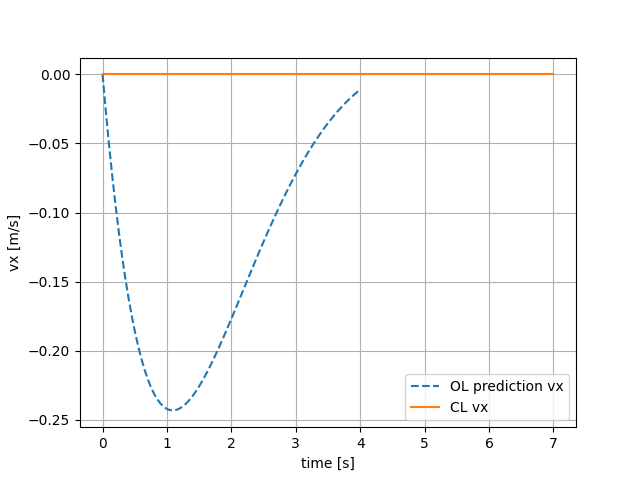

In [6]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_ol[:,0], x_ol[2,:,0], '--', label="OL prediction vx")
plt.plot(t_cl, x_cl[6,:], label="CL vx")
plt.xlabel("time [s]")
plt.ylabel("vx [m/s]")
plt.legend()
plt.grid(True)


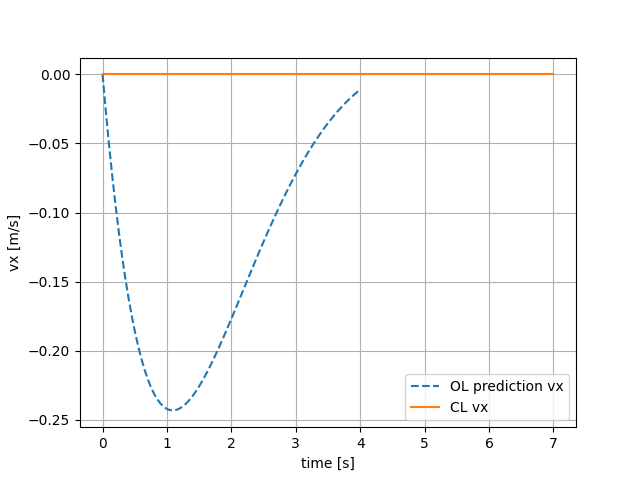

In [7]:
plt.figure()

# OL prediction at time k=0 (reconstructed)
vx_ol = mpc.mpc_x.xs[2] + x_ol[2,:,0]
plt.plot(t_ol[:,0], vx_ol, '--', label="OL prediction vx")

# CL trajectory
plt.plot(t_cl, x_cl[6,:], label="CL vx")

plt.xlabel("time [s]")
plt.ylabel("vx [m/s]")
plt.legend()
plt.grid(True)


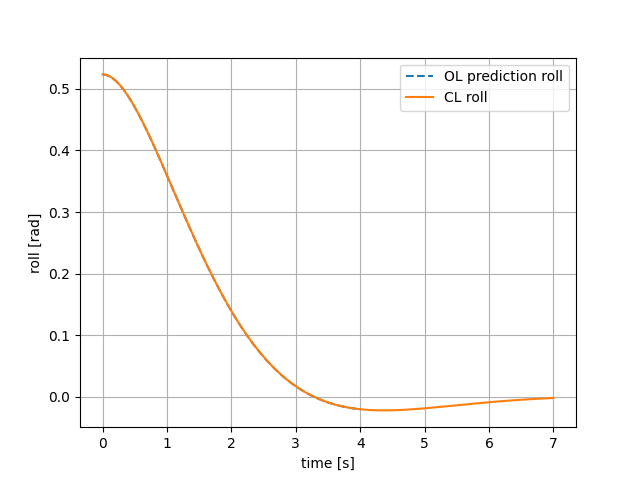

In [8]:
plt.figure()

# Open-loop prediction of vx at time k=0 (FULL state index!)
plt.plot(
    t_ol[:, 0],
    x_ol[5, :, 0],     # <-- index 6 = vx
    '--',
    label="OL prediction roll"
)

# Closed-loop vx
plt.plot(
    t_cl,
    x_cl[5, :],
    label="CL roll"
)

plt.xlabel("time [s]")
plt.ylabel("roll [rad]")
plt.legend()
plt.grid(True)


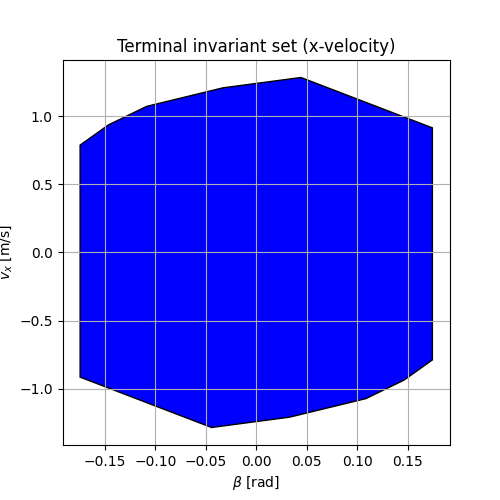

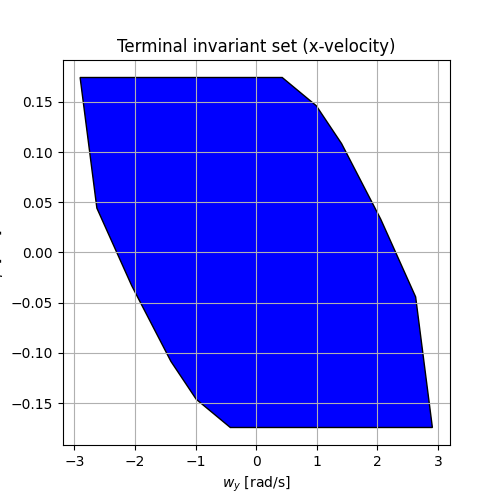

In [9]:
import matplotlib.pyplot as plt

#############

    # X

#############

Xf_x = mpc.mpc_x.Xf   # terminal invariant set for xvel

fig, ax = plt.subplots(1, 1, figsize=(5,5))

Xf_x.projection(dims=(1,2)).plot(ax=ax)

ax.set_xlabel(r'$\beta$ [rad]')
ax.set_ylabel(r'$v_x$ [m/s]')
ax.set_title('Terminal invariant set (x-velocity)')
ax.grid(True)


fig, ax = plt.subplots(1, 1, figsize=(5,5))

Xf_x.projection(dims=(0,1)).plot(ax=ax)


ax.set_xlabel(r'$w_y$ [rad/s]')
ax.set_ylabel(r'$\beta$ [rad]')
ax.set_title('Terminal invariant set (x-velocity)')
ax.grid(True)


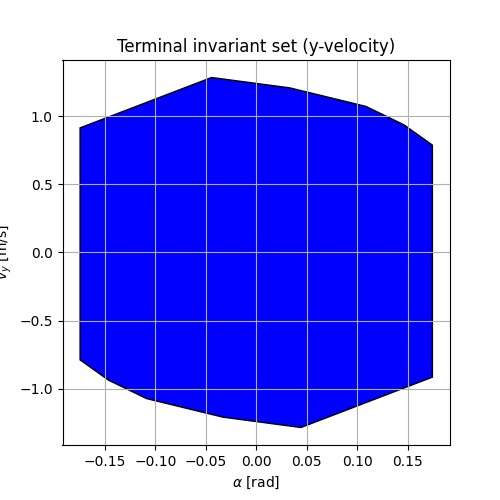

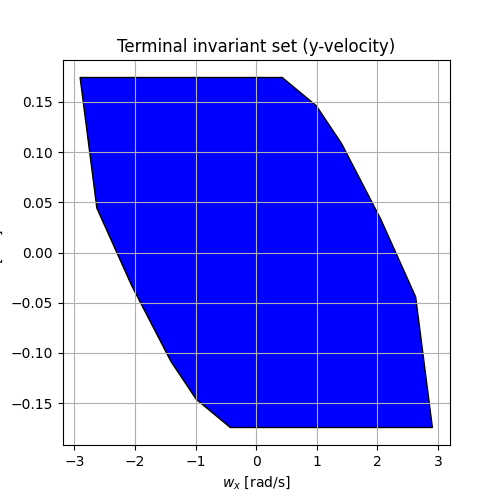

In [10]:
import matplotlib.pyplot as plt

#############

    # Y

#############

Xf_y = mpc.mpc_y.Xf   # terminal invariant set for yvel

fig, ax = plt.subplots(1, 1, figsize=(5,5))

Xf_y.projection(dims=(1,2)).plot(ax=ax)

ax.set_xlabel(r'$\alpha$ [rad]')
ax.set_ylabel(r'$v_y$ [m/s]')
ax.set_title('Terminal invariant set (y-velocity)')
ax.grid(True)


fig, ax = plt.subplots(1, 1, figsize=(5,5))

Xf_y.projection(dims=(0,1)).plot(ax=ax)


ax.set_xlabel(r'$w_x$ [rad/s]')
ax.set_ylabel(r'$\alpha$ [rad]')
ax.set_title('Terminal invariant set (y-velocity)')
ax.grid(True)

In [11]:
import matplotlib.pyplot as plt

#############

    # Z

#############

Xf_z = mpc.mpc_z.Xf   # terminal invariant set for zvel
print("Terminal vz interval:", Xf_z.b)
# [Vz, -Vz]



Terminal vz interval: [13.32333333 26.65666667]


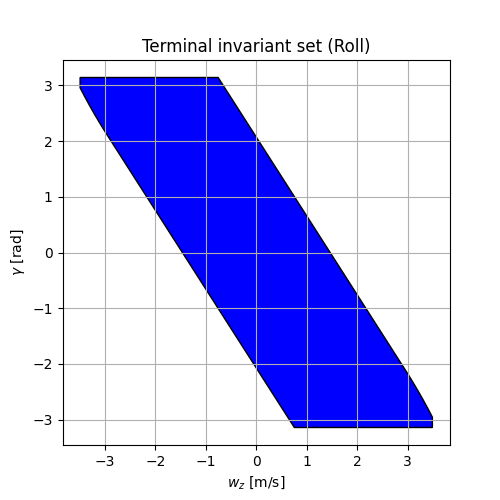

In [12]:
import matplotlib.pyplot as plt

#############

    # Roll

#############

Xf_r = mpc.mpc_roll.Xf   # terminal invariant set for yvel

fig, ax = plt.subplots(1, 1, figsize=(5,5))

Xf_r.projection(dims=(0,1)).plot(ax=ax)

ax.set_xlabel(r'$w_z$ [m/s]')
ax.set_ylabel(r'$\gamma$ [rad]')
ax.set_title('Terminal invariant set (Roll)')
ax.grid(True)

In [13]:
# u, x_ol, u_ol, t_ol, = mpc.get_u(0, x0)
# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol)

In [14]:
# x1 = rocket.simulate_step(x0, Ts, u, method='nonlinear')
# t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_control(mpc, sim_time, H, x0, \
# method='linear')

# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0
# vis.animate(t_ol[:-1], x_ol[:,:-1], u_ol)